### Import packages

In [1]:
#Import general libs you'll need
import os
import geopandas as gpd
from shapely.geometry import Point

# Import functions from main
from main import get_atl_at_photon_rate
from main import get_atl_at_seg

# Import functions from the utils
from utils import plotter

### Identify files



In [2]:
atl03_dir = '/home/ejg2736/network_drives/walker/exports/nfs_share/Data/ICESat-2/REL006/florida_aoi/atl03'
atl03_name = 'ATL03_20200212094736_07280607_006_01.h5'
atl03_file = os.path.join(atl03_dir, atl03_name)

# Define ATL08 File
atl08_dir = '/home/ejg2736/network_drives/walker/exports/nfs_share/Data/ICESat-2/REL006/florida_aoi/atl08'
atl08_name = 'ATL08_20200212094736_07280607_006_01.h5'
atl08_file = os.path.join(atl08_dir, atl08_name)

# Define ATL24 file
atl24_dir = '/home/ejg2736/network_drives/walker/exports/nfs_share/Data/ICESat-2/REL006/florida_aoi/atl24'
atl24_name = 'ATL24_20200212094736_07280607_006_01_001_01.h5'
atl24_file = os.path.join(atl24_dir, atl24_name)

# Define the ground track of interest
gt = 'gt1r'

### Get photon rate dataframe


In [3]:
# Get photon rate DF
df_ph = get_atl_at_photon_rate(atl03_file, atl08_file, atl24_file, gt)

### Plot output 

Well, it works on my machine

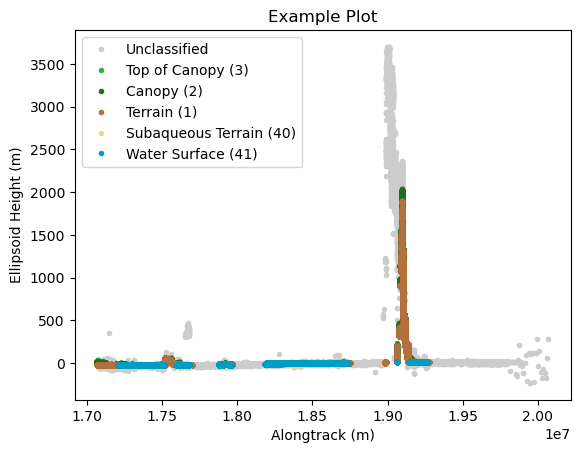

In [4]:
import matplotlib.pyplot as plt
plotter.plot_alongtrack(df_ph.alongtrack, df_ph.h_ph, df_ph.combined_class,'Example Plot')

### Aggregate data

This function will aggregate the data into 10 m segments

In [5]:
# Aggregate photon rate DF to 10 m segment 
df_seg = get_atl_at_seg(df_ph, res = 10)

### Write out the data

Write out the data as a geopandas dataframe if needed

In [6]:
# Write out as geopandas dataframe
geometry_seg = [Point(xy) for xy in zip(df_seg.longitude, df_seg.latitude)]
gdf_seg = gpd.GeoDataFrame(df_seg, geometry=geometry_seg, crs="EPSG:4326")

# Save geopandas dataframe
gdf_seg.to_file("is2_topobathy.gpkg", layer='atl08atl24', driver="GPKG")